Sentiment Analysis on Letter content

In [1]:
# import the dataet
import pandas as pd
df = pd.read_csv('recommendations.csv')
df.head()

,Recommendation,Sentiment,Score
0,I highly recommend John as an exceptional unde...,positive,1
1,I regret to say that I cannot provide a positi...,negative,0
2,I enthusiastically endorse Michael as an excep...,positive,1
3,I highly recommend John for his exceptional wo...,positive,1
4,Sarah is a valuable asset to any team and I wh...,positive,1


In [10]:
df.columns  #check columns

Index(['Recommendation', 'Sentiment', 'Score'], dtype='object')

In [11]:
df['Sentiment'].value_counts()  # value of the sentiment columns

Sentiment
positive    39
negative    24
Name: count, dtype: int64

Convert categorical values to numeric 

In [12]:
sentiment_label = df.Sentiment.factorize()
sentiment_label

(array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [13]:
words = df.Recommendation.values  # retrieve all the text data from the dataet

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

#tokenize all the words and sentences
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(words)  #create a association between the words and the assigned numbers

In [15]:
encoded_docs = tokenizer.texts_to_sequences(words)  # replace the words with their assigned numbers 

In [16]:
#used padding as each of the sentence is not in equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

Build the text classifier

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = 1000
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))  #regularization techniques to avoid overfitting
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           32000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 48,651
Trainable params: 48,651
Non-trainable params: 0
__________________________________________________

Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

In [19]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
2/2 [==============================] - 3s 372ms/step - loss: 0.6933 - accuracy: 0.4600 - val_loss: 0.6900 - val_accuracy: 0.6923
Epoch 2/5
2/2 [==============================] - 0s 124ms/step - loss: 0.6887 - accuracy: 0.6200 - val_loss: 0.6867 - val_accuracy: 0.6923
Epoch 3/5
2/2 [==============================] - 0s 122ms/step - loss: 0.6858 - accuracy: 0.6400 - val_loss: 0.6829 - val_accuracy: 0.6923
Epoch 4/5
2/2 [==============================] - 0s 143ms/step - loss: 0.6832 - accuracy: 0.6000 - val_loss: 0.6785 - val_accuracy: 0.6923
Epoch 5/5
2/2 [==============================] - 0s 128ms/step - loss: 0.6802 - accuracy: 0.6000 - val_loss: 0.6736 - val_accuracy: 0.6923


Training set accuracy 60%
Testing set accuracy  69.23%

Plot the metrics 

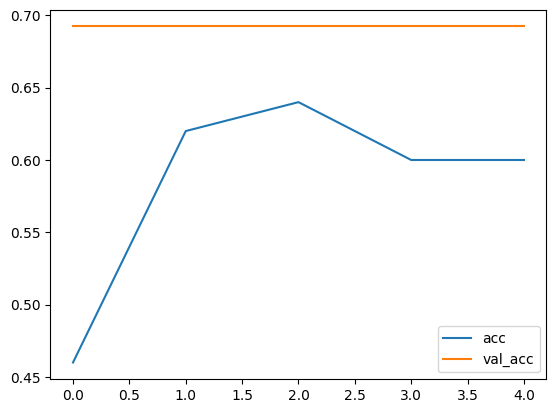

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

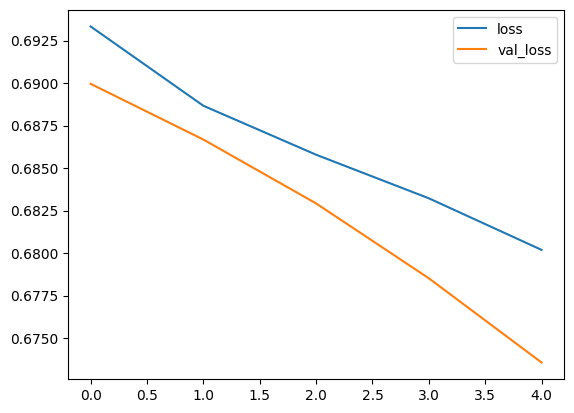

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

Sentiment analysis execution

In [22]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

Extract the letter

In [23]:
import PyPDF2
import numpy as np

# Step 1: Extract text from the PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

print(extracted_text)

  intellectual creativity necessary to complete an advanced graduate degree. I would therefore highly recommend Jane Doe. If her performance in my class is a good indication of how she would perform as a graduate student, she would be an extremely positive asset to your program. If I can be of any further assistance, or provide you with any further information, please do not hesitate to contact me. Yours sincerely, [sender’s signature] [sender’s name and title] 	f university]. I am a fifth-year Ph.D. student at the University of California, Berkeley. I came to know Jane when I was her Graduate Student Instructor for Philosophy 111: Ethical Relativism, taught by Professor John Smith. The course comprised [short description of course]. Jane distinguished herself by submitting an exceptionally well researched and interesting project on ethical practices in ancient Greece. I would rank her in the top 2% of students that I have taught in the past five years in respect of her writing ability

Final output - sentiment on the Letter

In [24]:
predict_sentiment(extracted_text)

1/1 [==============================] - 0s 223ms/step
Predicted label:  positive
